In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [82]:
# Load the dataset
data = pd.read_csv('/home/brandon-ism/Documents/data/m444/who_life/life-expectancy-who/who_train.csv')

# Clean column names
data.columns = data.columns.str.strip()

# Drop unnecessary columns for EDA
columns_to_drop = ["Country", "Year"]
eda_data = data.drop(columns=columns_to_drop)

# Convert 'Status' column to dummy variables
eda_data = pd.get_dummies(eda_data, columns=["Status"], drop_first=True)

# Ensure all columns are strictly numeric
eda_data = eda_data.apply(pd.to_numeric, errors="coerce")

# Handle missing and infinite values
eda_data = eda_data.fillna(0).replace([np.inf, -np.inf], 0)
\
# Check column types
print("Column types:")
print(eda_data.dtypes)


Column types:
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
Status_Developing                     bool
dtype: object


In [83]:
# 1. Summary stats
print("Summary Statistics:")
print(eda_data.describe())

Summary Statistics:
       Life expectancy  Adult Mortality  infant deaths     Alcohol  \
count       183.000000       183.000000     183.000000  183.000000   
mean         71.536612       148.688525      24.557377    3.253443   
std           8.560831       106.025532      87.045749    4.150709   
min          48.100000         1.000000       0.000000    0.000000   
25%          65.600000        66.000000       0.000000    0.010000   
50%          73.600000       135.000000       2.000000    0.260000   
75%          76.850000       216.500000      18.000000    6.660000   
max          89.000000       522.000000     957.000000   15.190000   

       percentage expenditure  Hepatitis B       Measles         BMI  \
count              183.000000   183.000000    183.000000  183.000000   
mean              1001.912550    78.573770   1831.207650   40.582514   
std               2553.290079    29.570065   8770.076631   21.424645   
min                  0.000000     0.000000      0.000000    0

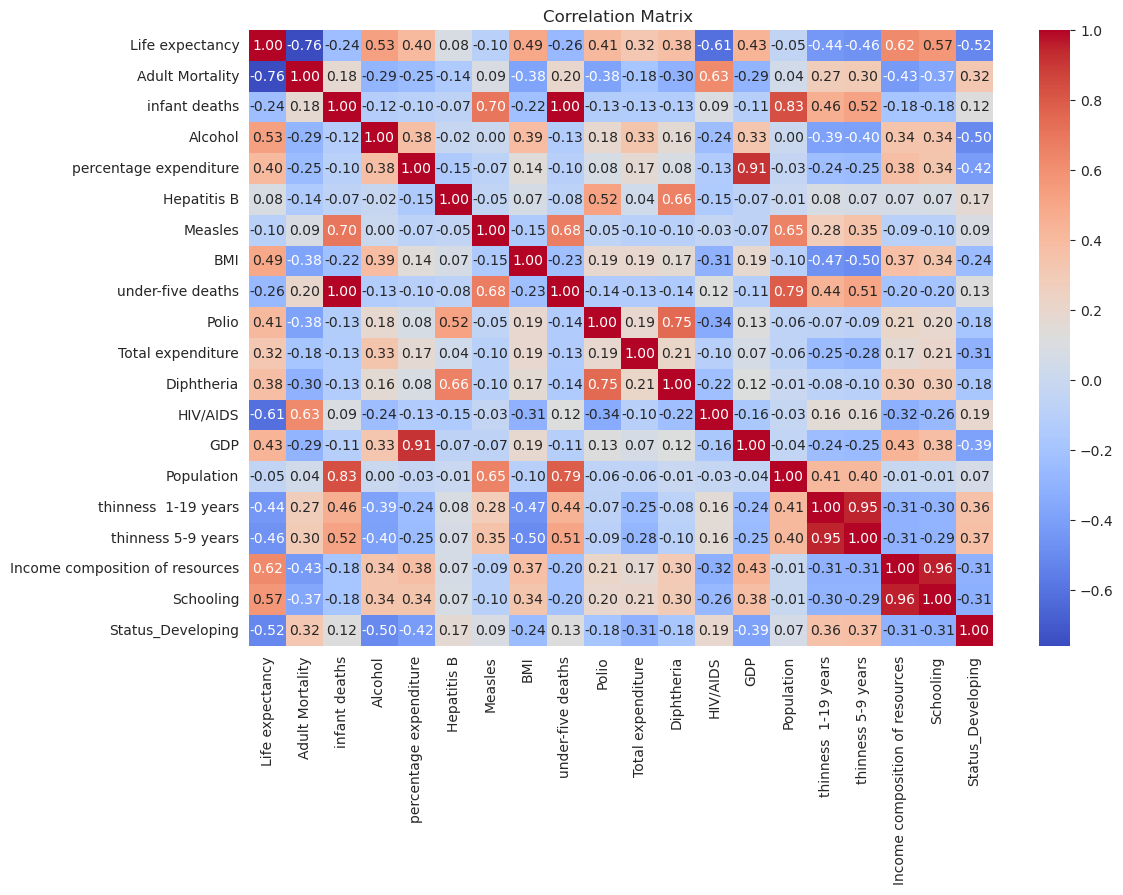

In [84]:
# 2. Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(eda_data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix ")
plt.show()

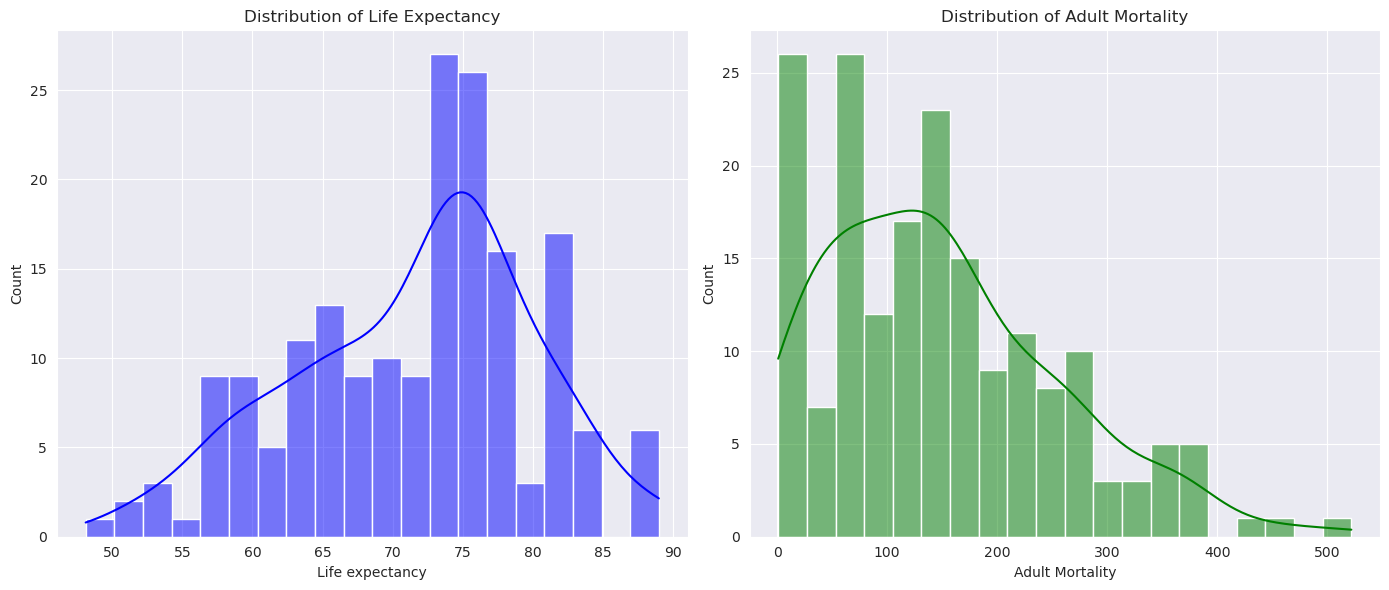

In [85]:
# 3. Distributions of the target variable and predictors
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(eda_data["Life expectancy"], kde=True, bins=20, color='blue')
plt.title("Distribution of Life Expectancy")

plt.subplot(1, 2, 2)
sns.histplot(eda_data["Adult Mortality"], kde=True, bins=20, color='green')
plt.title("Distribution of Adult Mortality")
plt.tight_layout()
plt.show()

The features in #4 were chosen from the baseline linear model.
They had significant or marginally significant features.

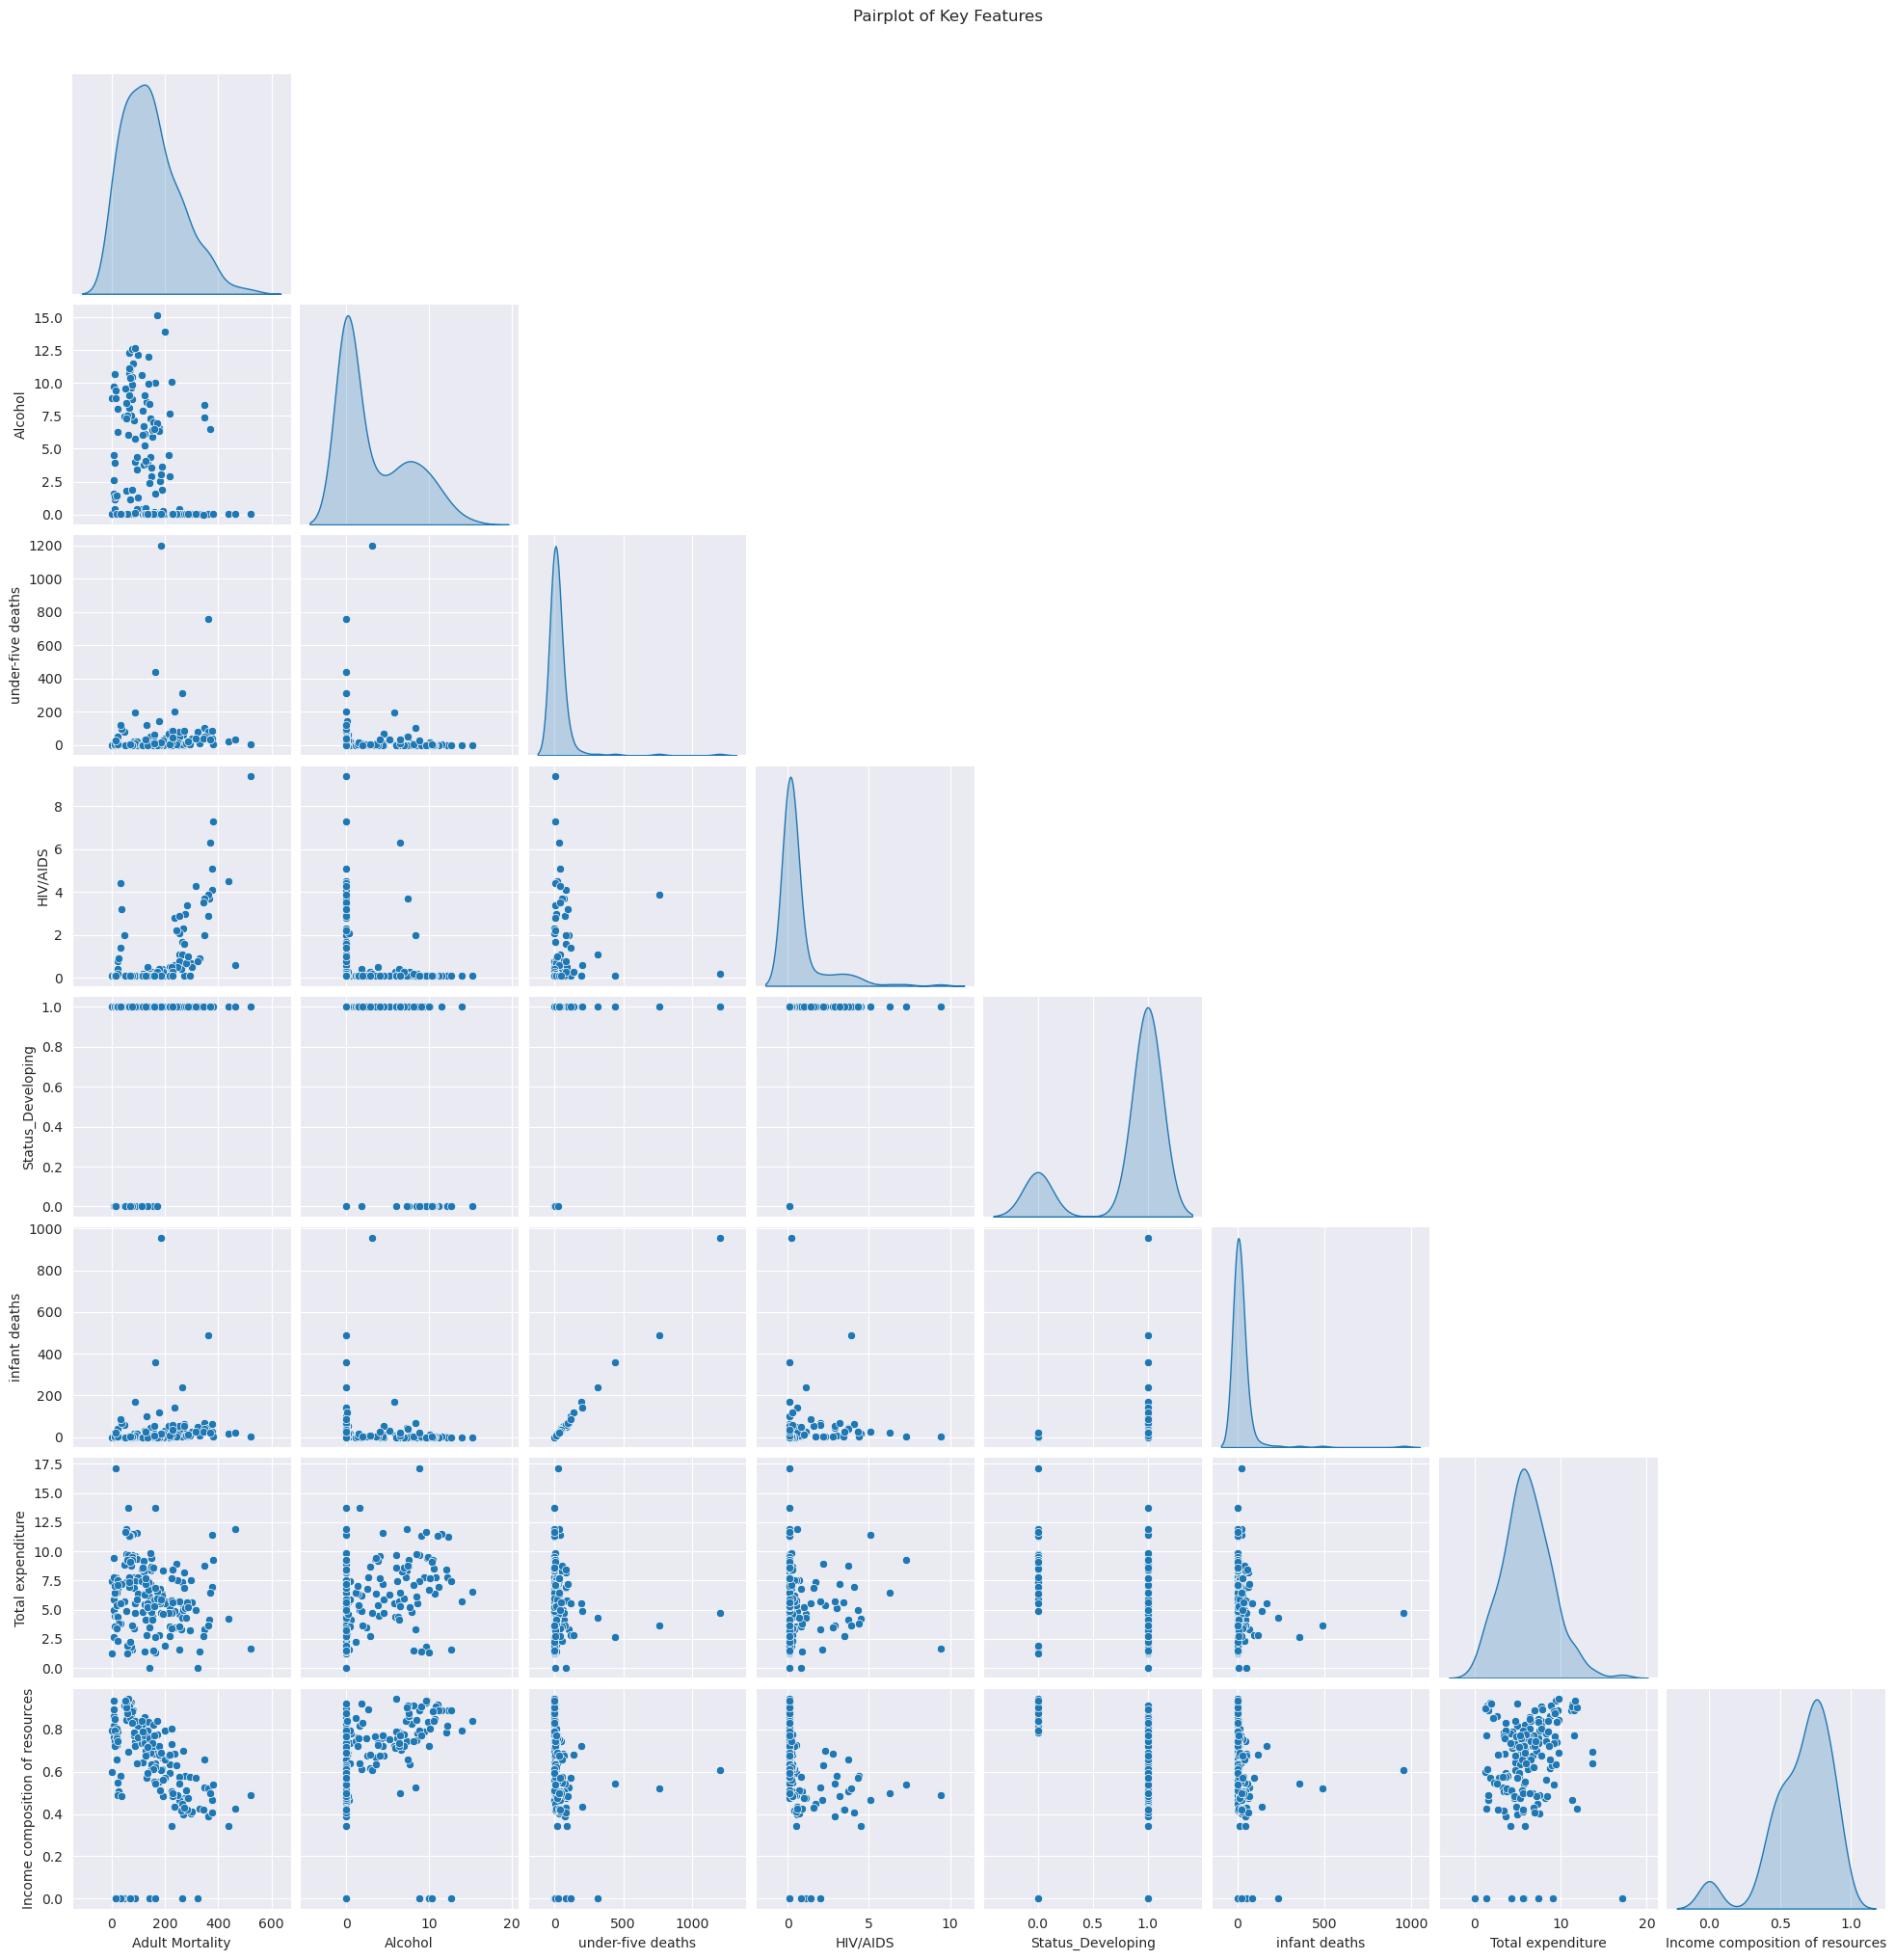

In [86]:

# 4. Pairplot for selected features
significant_features = [
    "Adult Mortality",
    "Alcohol",
    "under-five deaths",
    "HIV/AIDS",
    "Status_Developing",
    "infant deaths",
    "Total expenditure",
    "Income composition of resources"
]

sns.pairplot(eda_data[significant_features], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

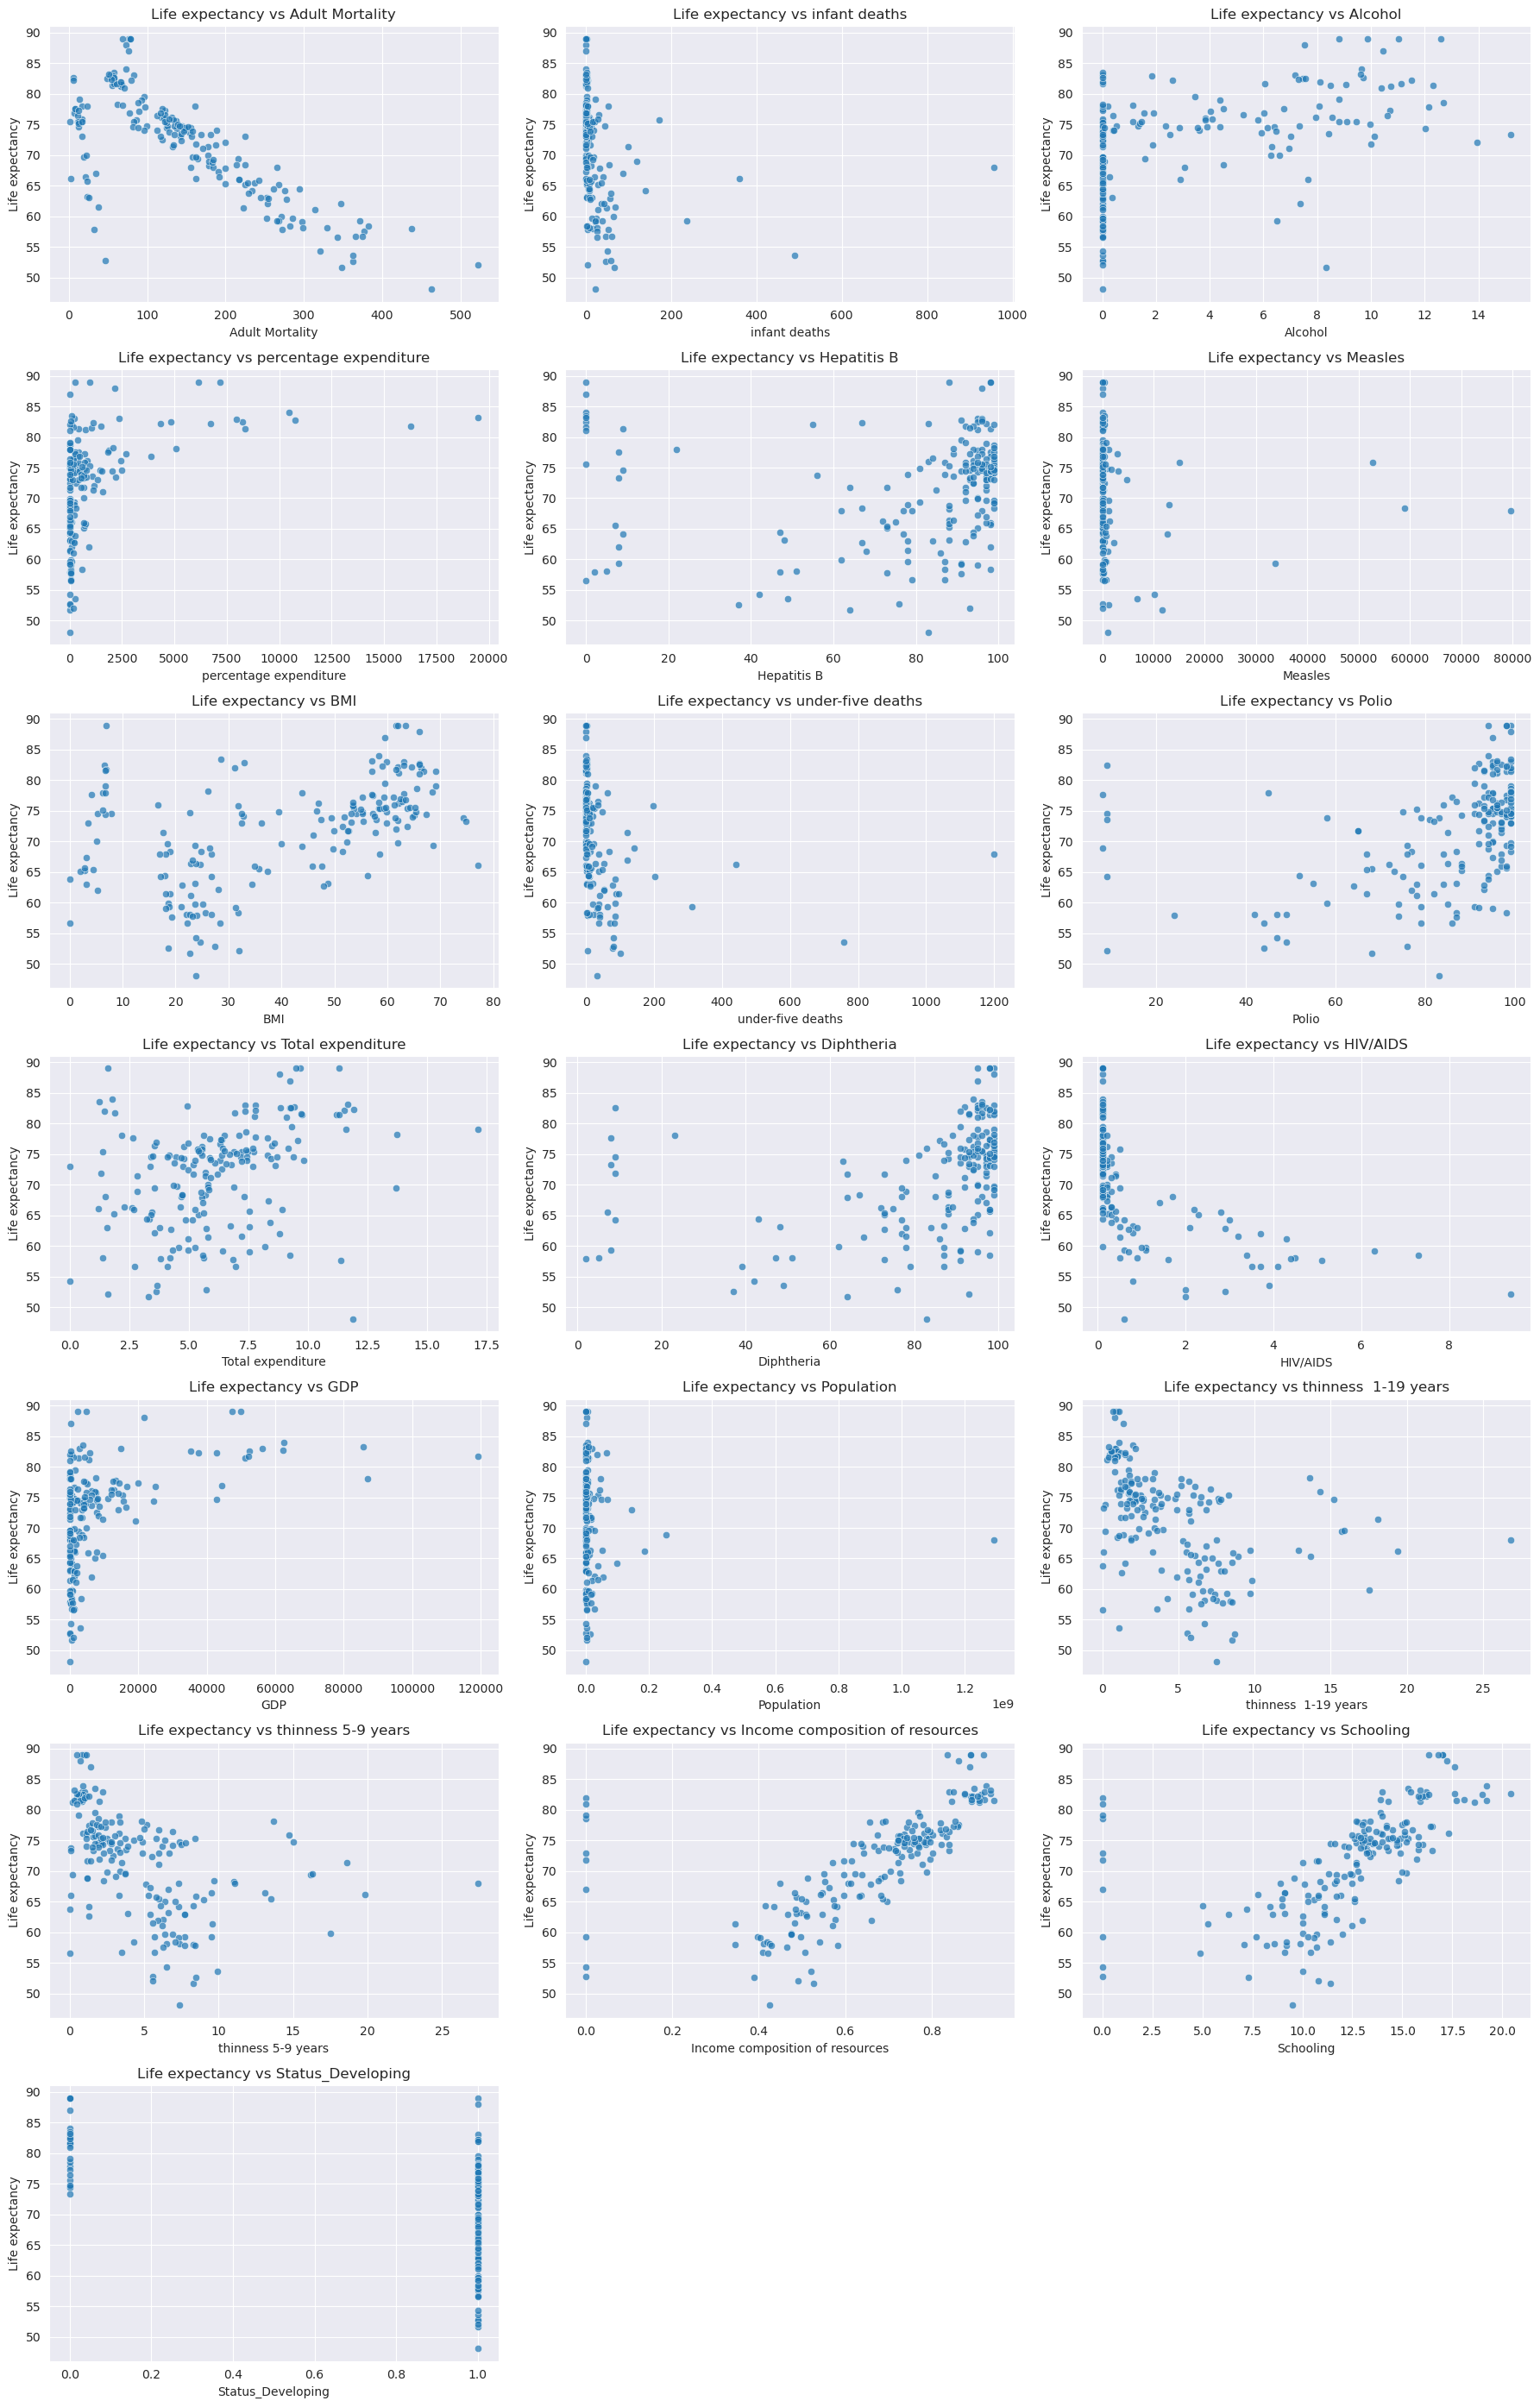

In [87]:
# 5. Plot the correlation of every feature with the target
target = "Life expectancy"
features = [col for col in eda_data.columns if col != target]


num_features = len(features)
cols = 3
rows = (num_features + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 4))
for i, feature in enumerate(features, start=1):
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=eda_data, x=feature, y=target, alpha=0.7)
    plt.title(f"{target} vs {feature}")
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()
